<a href="https://colab.research.google.com/github/ASingh-AGH/AI_Collab/blob/main/DLMIA%20Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (4,)
Dtype: float32
Shape: (256, 256)
Dtype: float32
0.0
1.0


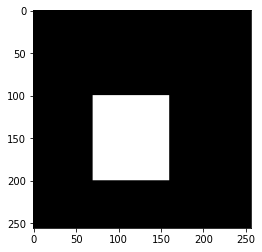

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd


array = np.array([1, 2, 3, 4], dtype=np.float32)
print(f"Shape: {array.shape}")
print(f"Dtype: {array.dtype}")


n_rows = 256
n_cols = 256
array = np.zeros((n_rows, n_cols), dtype=np.float32)
print(f"Shape: {array.shape}")
print(f"Dtype: {array.dtype}")

array[100:200, 70:160] = 1

print(array[5, 4])
print(array[120, 90])

plt.figure()
plt.imshow(array, cmap='gray')
plt.show()

X Shape: (256, 256)
Y Shape: (256, 256)


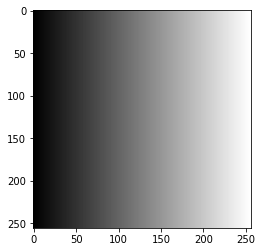

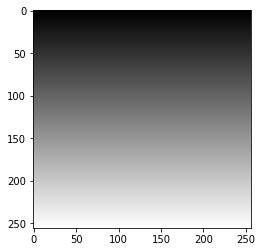

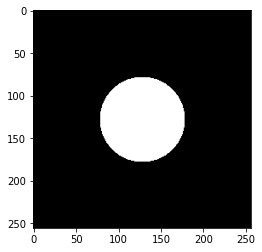

In [ ]:
y_size = 256
x_size = 256
x_origin = 128
y_origin = 128
radius = 50

"""
(x - x_origin)**2 + (y - y_origin)**2 < radius**2
"""

x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))
array = (x - x_origin)**2 + (y - y_origin)**2 < radius**2

print(f"X Shape: {x.shape}")
print(f"Y Shape: {y.shape}")

plt.figure()
plt.imshow(x, cmap='gray')
plt.show()

plt.figure()
plt.imshow(y, cmap='gray')
plt.show()

plt.figure()
plt.imshow(array, cmap='gray')
plt.show()

In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.4 MB/s eta 0:00:00


Type: <class 'SimpleITK.SimpleITK.Image'>
Shape: (598, 282)
Dtype: uint8
X Gradient shape: (598, 282)
Y Gradient shape: (598, 282)


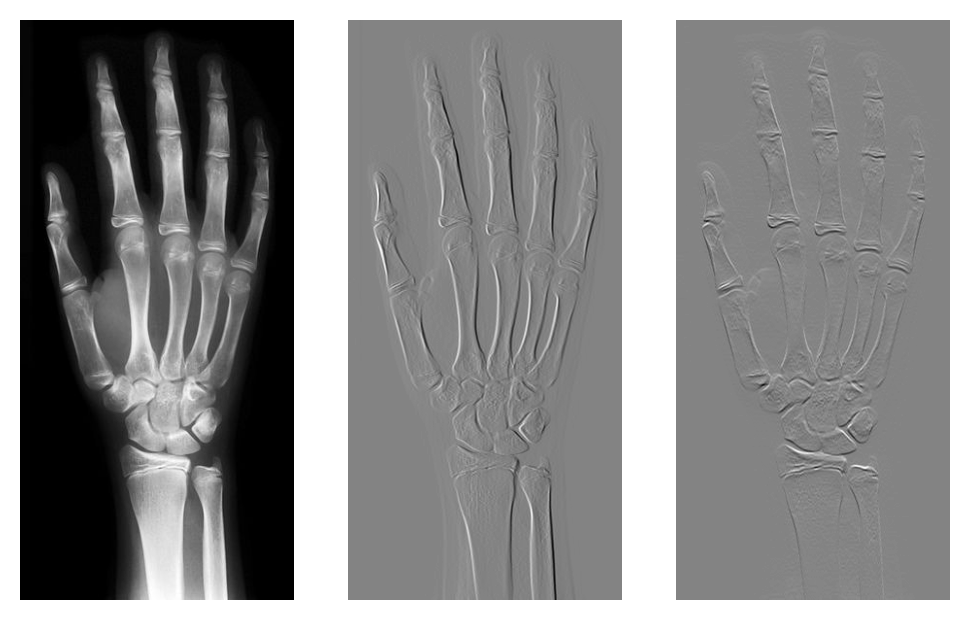

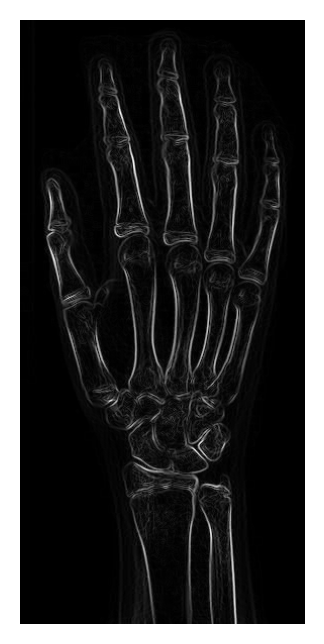

In [ ]:
import SimpleITK as sitk

image = sitk.ReadImage('xray.jpg')
array = sitk.GetArrayFromImage(image)
print(f"Type: {type(image)}")


print(f"Shape: {array.shape}")
print(f"Dtype: {array.dtype}")

"""
I(y, x) -> R
G(I(y, x)) = [dI(y, x)/dy, dI(y, x)/dx]
"""


"""
Input: array
Gy = darray(y, x) / dy = [array(y + 1, x) - array(y - 1, x)] / 2

"""

gradient = np.gradient(array)
gradient_y = gradient[0]
gradient_x = gradient[1]

print(f"X Gradient shape: {gradient_x.shape}")
print(f"Y Gradient shape: {gradient_y.shape}")

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(array, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(dpi=200)
plt.imshow(np.sqrt(gradient_x**2 + gradient_y**2), cmap='gray')
plt.axis('off')
plt.show()


Shape: (598, 282)
Dtype: float32
Filter shape: (3, 3)


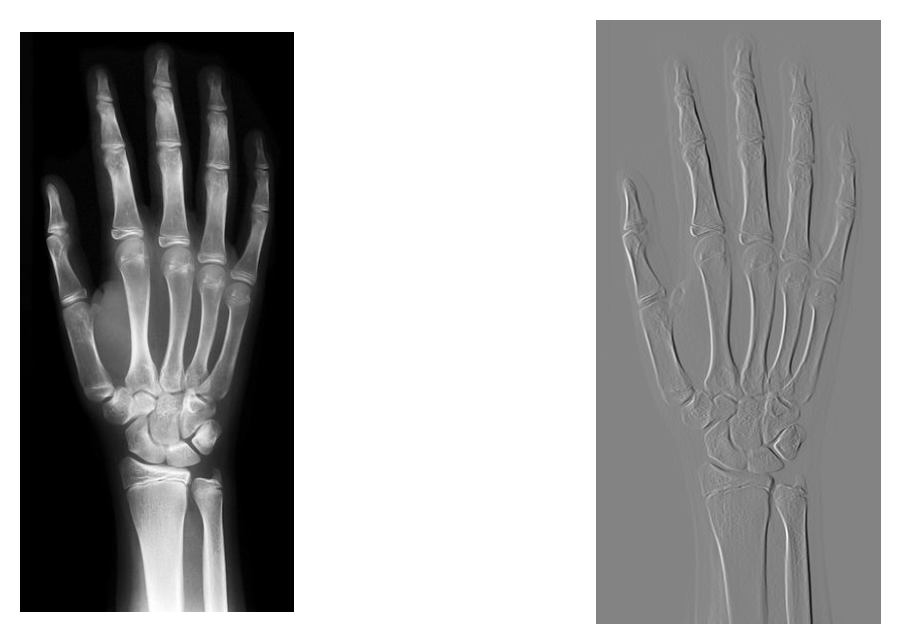

In [ ]:
image = sitk.ReadImage('xray.jpg')
array = sitk.GetArrayFromImage(image)
array = array.astype(np.float32)

print(f"Shape: {array.shape}")
print(f"Dtype: {array.dtype}")

filter = np.ones((11, 11), dtype=np.float32)
filter = np.array([
    [0, 0, 0],
    [1, 0, -1],
    [0, 0, 0]
])
print(f"Filter shape: {filter.shape}")

filtered_image = nd.convolve(array, filter)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(array, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()
